# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [2]:
#!pip install citipy

In [3]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [4]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

605

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [5]:
#set base url
base_url = f'http://api.openweathermap.org/data/2.5/weather?'


In [6]:
#cities=['paris', 'rome', 'berlin', 'new york', 'boston', 'chicago']
#dataframe
df_weather = pd.DataFrame()
df_weather['City'] = ''
df_weather['Lat'] = ''
df_weather['Lng'] = ''
df_weather['Max Temp'] = ''
df_weather['Humidity'] = ''
df_weather['Cloudiness'] = ''
df_weather['Wind Speed'] = ''
df_weather['Country'] = ''
df_weather['Date'] = ''
#make api call. run loop to save dataframe to local, get data from local only
#put the breaks on my loop to keep from too many calls.  Originaly set max_records to 600. -1 keeps loop from running
#create counters
max_records = 600
record_count = 1
set_count = 1
i = 0

for city in cities:
    if i > max_records:
        break
    url = f'{base_url}q={city}&appid={weather_api_key}&units=imperial'
    
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0
        
    # Add 1 to the record count
    record_count += 1
        
    # Log the url, record, and set numbers
    print(f'Processing Record {record_count}, set {set_count} | {city}')
    
    try:
        response = requests.get(url).json()
        #parse out info for dataframe
        df_weather.loc[i, 'City'] = city
        df_weather.loc[i, 'Lat'] = response['coord']['lat']
        df_weather.loc[i, 'Lng'] = response['coord']['lon']
        df_weather.loc[i, 'Max Temp'] = response['main']['temp_max']
        df_weather.loc[i, 'Humidity'] = response['main']['humidity']
        df_weather.loc[i, 'Cloudiness'] = response['clouds']['all']
        df_weather.loc[i, 'Wind Speed'] = response['wind']['speed']
        df_weather.loc[i, 'Country'] = response['sys']['country']
        df_weather.loc[i, 'Date'] = response['dt']
       
    except:
        print(f'{city} not found')
    i = i + 1

#Export the city data into a csv.
if len(df_weather) > 1:
    df_weather.to_csv('df_weather.csv', index=False)
df_weather=pd.read_csv('df_weather.csv')
len(df_weather)

Processing Record 2, set 1 | boueni
Processing Record 3, set 1 | mortka
Processing Record 4, set 1 | turkistan
Processing Record 5, set 1 | nikolskoye
Processing Record 6, set 1 | bethel
Processing Record 7, set 1 | general pico
Processing Record 8, set 1 | mys shmidta
mys shmidta not found
Processing Record 9, set 1 | albany
Processing Record 10, set 1 | nhulunbuy
Processing Record 11, set 1 | yellowknife
Processing Record 12, set 1 | saint-augustin
Processing Record 13, set 1 | palmerston north
Processing Record 14, set 1 | puerto ayora
Processing Record 15, set 1 | georgetown
Processing Record 16, set 1 | peniche
Processing Record 17, set 1 | ribeira grande
Processing Record 18, set 1 | erzin
Processing Record 19, set 1 | vestmannaeyjar
Processing Record 20, set 1 | ushuaia
Processing Record 21, set 1 | new norfolk
Processing Record 22, set 1 | grimshaw
Processing Record 23, set 1 | port alfred
Processing Record 24, set 1 | jamestown
Processing Record 25, set 1 | punta arenas
Proces

Processing Record 4, set 5 | hithadhoo
Processing Record 5, set 5 | havre-saint-pierre
Processing Record 6, set 5 | wukari
Processing Record 7, set 5 | ishigaki
Processing Record 8, set 5 | saskylakh
Processing Record 9, set 5 | moose factory
Processing Record 10, set 5 | male
Processing Record 11, set 5 | gladstone
Processing Record 12, set 5 | candelaria
Processing Record 13, set 5 | kenai
Processing Record 14, set 5 | gat
Processing Record 15, set 5 | muros
Processing Record 16, set 5 | butaritari
Processing Record 17, set 5 | wangaratta
Processing Record 18, set 5 | jacqueville
Processing Record 19, set 5 | vardo
Processing Record 20, set 5 | monte alegre
Processing Record 21, set 5 | nador
Processing Record 22, set 5 | hoopstad
Processing Record 23, set 5 | mubende
Processing Record 24, set 5 | sentyabrskiy
sentyabrskiy not found
Processing Record 25, set 5 | kurchum
Processing Record 26, set 5 | kaspiyskiy
Processing Record 27, set 5 | iqaluit
Processing Record 28, set 5 | founta

Processing Record 12, set 9 | rawannawi
rawannawi not found
Processing Record 13, set 9 | solnechnyy
Processing Record 14, set 9 | warqla
warqla not found
Processing Record 15, set 9 | birjand
Processing Record 16, set 9 | tyulyachi
Processing Record 17, set 9 | hope
Processing Record 18, set 9 | qaqortoq
Processing Record 19, set 9 | kidal
Processing Record 20, set 9 | porbandar
Processing Record 21, set 9 | saleaula
saleaula not found
Processing Record 22, set 9 | bargal
bargal not found
Processing Record 23, set 9 | dunedin
Processing Record 24, set 9 | khilok
Processing Record 25, set 9 | yangmei
Processing Record 26, set 9 | novyy urengoy
Processing Record 27, set 9 | kasongo-lunda
Processing Record 28, set 9 | yumen
Processing Record 29, set 9 | booue
Processing Record 30, set 9 | sakakah
Processing Record 31, set 9 | lydenburg
Processing Record 32, set 9 | luanda
Processing Record 33, set 9 | pangnirtung
Processing Record 34, set 9 | walvis bay
Processing Record 35, set 9 | lich

601

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [7]:
df_weather

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,boueni,-12.90,45.08,80.60,74.0,20.0,6.93,YT,1.605544e+09
1,mortka,59.33,66.02,12.25,91.0,86.0,5.21,RU,1.605544e+09
2,turkistan,43.00,68.00,20.23,84.0,0.0,7.43,KZ,1.605544e+09
3,nikolskoye,59.70,30.79,34.00,86.0,90.0,6.71,RU,1.605544e+09
4,bethel,41.37,-73.41,50.00,43.0,20.0,12.75,US,1.605544e+09
...,...,...,...,...,...,...,...,...,...
596,ndele,8.41,20.65,79.66,30.0,0.0,2.17,CF,1.605544e+09
597,maralal,1.10,36.70,61.52,78.0,60.0,10.78,KE,1.605544e+09
598,vila,42.03,-8.16,57.00,81.0,97.0,0.31,PT,1.605544e+09
599,kangundo,-1.30,37.35,71.60,60.0,75.0,10.29,KE,1.605544e+09


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [8]:
df_low_humid = df_weather.loc[df_weather['Humidity'] < 100]
df_low_humid

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,boueni,-12.90,45.08,80.60,74.0,20.0,6.93,YT,1.605544e+09
1,mortka,59.33,66.02,12.25,91.0,86.0,5.21,RU,1.605544e+09
2,turkistan,43.00,68.00,20.23,84.0,0.0,7.43,KZ,1.605544e+09
3,nikolskoye,59.70,30.79,34.00,86.0,90.0,6.71,RU,1.605544e+09
4,bethel,41.37,-73.41,50.00,43.0,20.0,12.75,US,1.605544e+09
...,...,...,...,...,...,...,...,...,...
596,ndele,8.41,20.65,79.66,30.0,0.0,2.17,CF,1.605544e+09
597,maralal,1.10,36.70,61.52,78.0,60.0,10.78,KE,1.605544e+09
598,vila,42.03,-8.16,57.00,81.0,97.0,0.31,PT,1.605544e+09
599,kangundo,-1.30,37.35,71.60,60.0,75.0,10.29,KE,1.605544e+09


In [9]:
#  Get the indices of cities that have humidity over 100%.
df_humid = df_weather.loc[df_weather['Humidity'] >= 100]
df_humid.index

Int64Index([25, 48, 64, 86, 119, 158, 192, 213, 238, 286, 323, 359, 524, 561], dtype='int64')

In [10]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".
df_clean = df_weather.drop(df_humid.index, inplace=False)
df_clean

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,boueni,-12.90,45.08,80.60,74.0,20.0,6.93,YT,1.605544e+09
1,mortka,59.33,66.02,12.25,91.0,86.0,5.21,RU,1.605544e+09
2,turkistan,43.00,68.00,20.23,84.0,0.0,7.43,KZ,1.605544e+09
3,nikolskoye,59.70,30.79,34.00,86.0,90.0,6.71,RU,1.605544e+09
4,bethel,41.37,-73.41,50.00,43.0,20.0,12.75,US,1.605544e+09
...,...,...,...,...,...,...,...,...,...
596,ndele,8.41,20.65,79.66,30.0,0.0,2.17,CF,1.605544e+09
597,maralal,1.10,36.70,61.52,78.0,60.0,10.78,KE,1.605544e+09
598,vila,42.03,-8.16,57.00,81.0,97.0,0.31,PT,1.605544e+09
599,kangundo,-1.30,37.35,71.60,60.0,75.0,10.29,KE,1.605544e+09


In [32]:
df_clean.to_csv('output_clean_data.csv', index_label="City_ID")

## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

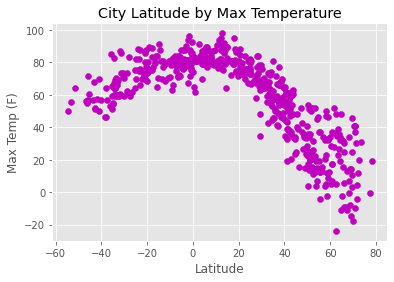

In [33]:
#create plot
df = df_clean
#df = df_clean[df_clean['Date'] == '1.605477e+09']
plt.scatter(df['Lat'], df['Max Temp'], c='m' )
#format plot    
plt.style.use('ggplot')   
plt.title('City Latitude by Max Temperature')
plt.ylabel('Max Temp (F)')
plt.xlabel('Latitude')

#export .png of figure
plt.savefig("Fig1.png")
plt.show()

## Latitude vs. Humidity Plot

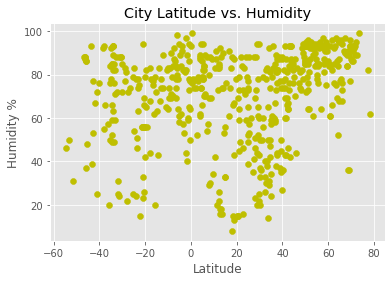

In [13]:
#create plot
df = df_clean
#df = df_clean[df_clean['Date'] == '1.605477e+09']
plt.scatter(df['Lat'], df['Humidity'], c='y' )
#format plot    
plt.style.use('ggplot')   
plt.title('City Latitude vs. Humidity')
plt.ylabel('Humidity %')
plt.xlabel('Latitude')

#export .png of figure
plt.savefig("Fig2.png")
plt.show()

## Latitude vs. Cloudiness Plot

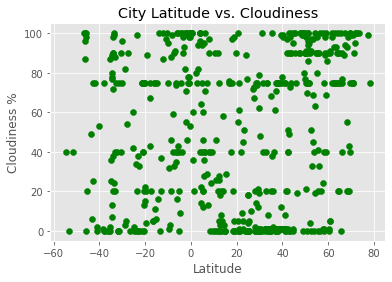

In [14]:
#create plot
df = df_clean
#df = df_clean[df_clean['Date'] == '1.605477e+09']
plt.scatter(df['Lat'], df['Cloudiness'], c='g' )
#format plot    
plt.style.use('ggplot')   
plt.title('City Latitude vs. Cloudiness')
plt.ylabel('Cloudiness %')
plt.xlabel('Latitude')

#export .png of figure
plt.savefig("Fig3.png")
plt.show()

## Latitude vs. Wind Speed Plot

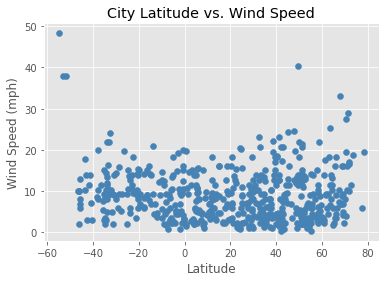

In [15]:
#create plot
df = df_clean
#df = df_clean[df_clean['Date'] == '1.605477e+09']
plt.scatter(df['Lat'], df['Wind Speed'], c='steelblue' )
#format plot    
plt.style.use('ggplot')   
plt.title('City Latitude vs. Wind Speed')
plt.ylabel('Wind Speed (mph)')
plt.xlabel('Latitude')

#export .png of figure
plt.savefig("Fig4.png")
plt.show()

## Linear Regression

In [36]:
#set up north and south hemisphear
df = df_clean
#north_df = df[df['Lat'] > 0]
#south_df = df[df['Lat'] < 0]
north_df = df.loc[(df["Lat"] >= 0)]
south_df = df.loc[(df["Lat"] < 0)]

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.7601078011140459


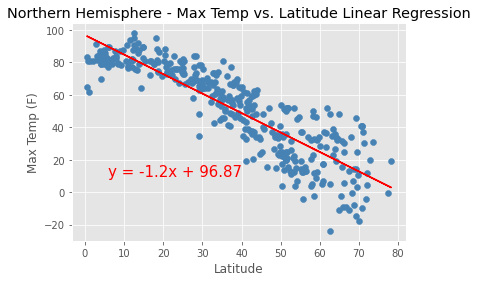

In [37]:
#Linear regression model
df = north_df
x_values = df['Lat']
y_values = df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")

#export .png of figure
plt.savefig("Fig5.png")
plt.show()

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-squared is: 0.5032077310992111


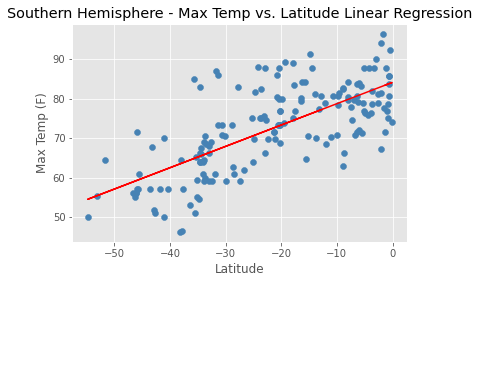

In [38]:
#Linear regression model
df = south_df
x_values = df['Lat']
y_values = df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color = 'steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate('line_eq',(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Max Temp (F)')
print(f"The r-squared is: {rvalue**2}")

#export .png of figure
plt.savefig("Fig6.png")
plt.show()

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.12668235813891818


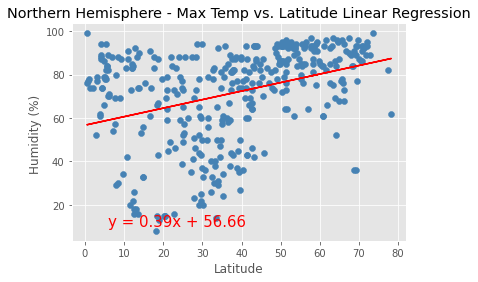

In [22]:
#Linear regression model
df = north_df
x_values = df['Lat']
y_values = df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%) ')
print(f"The r-squared is: {rvalue**2}")

#export .png of figure
plt.savefig("Fig7.png")
plt.show()

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

The r-squared is: 0.024565904743668245


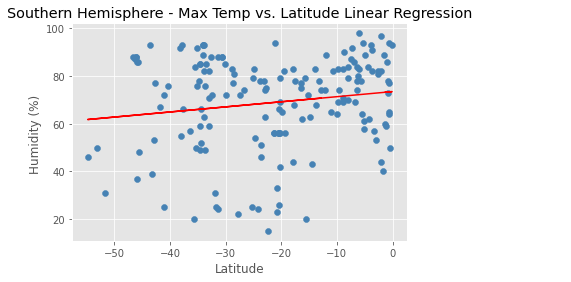

In [23]:
#Linear regression model
df = south_df
x_values = df['Lat']
y_values = df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Max Temp vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Humidity (%) ')
print(f"The r-squared is: {rvalue**2}")

#export .png of figure
plt.savefig("Fig8.png")
plt.show()

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.09390819432791979


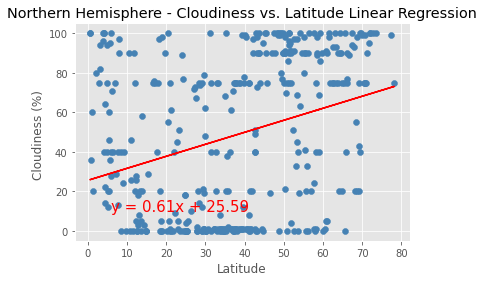

In [24]:
#Linear regression model
df = north_df
x_values = df['Lat']
y_values = df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
print(f"The r-squared is: {rvalue**2}")

#export .png of figure
plt.savefig("Fig9.png")
plt.show()

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

The r-squared is: 0.05196614418540472


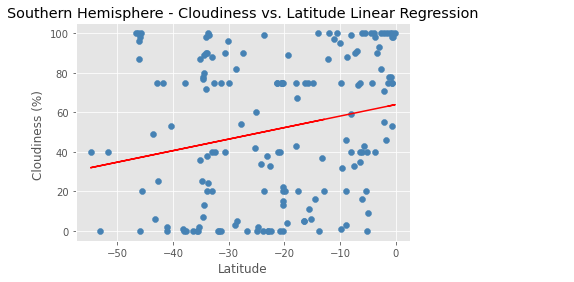

In [25]:
#Linear regression model
df = south_df
x_values = df['Lat']
y_values = df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Cloudiness vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Cloudiness (%) ')
print(f"The r-squared is: {rvalue**2}")

#export .png of figure
plt.savefig("Fig10.png")
plt.show()

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.02174722275457572


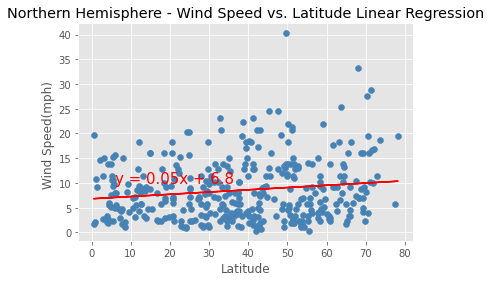

In [26]:
#Linear regression model
df = north_df
x_values = df['Lat']
y_values = df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Northern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph) ')
print(f"The r-squared is: {rvalue**2}")

#export .png of figure
plt.savefig("Fig11.png")
plt.show()

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

The r-squared is: 0.09164154866178512


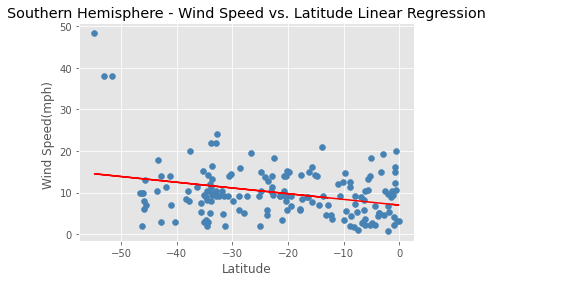

In [27]:
#Linear regression model
df = south_df
x_values = df['Lat']
y_values = df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

#plot
plt.style.use('ggplot')  
plt.scatter(x_values,y_values, color='steelblue')
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(6,10),fontsize=15,color="red")
plt.title('Southern Hemisphere - Wind Speed vs. Latitude Linear Regression')
plt.xlabel('Latitude')
plt.ylabel('Wind Speed(mph) ')
print(f"The r-squared is: {rvalue**2}")

#export .png of figure
plt.savefig("Fig12.png")
plt.show()